# Lasso and the L1 penalty

[Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) is linear regression with a [Laplace distribution](https://en.wikipedia.org/wiki/Laplace_distribution) with a location of 0 as the prior. In ML lingo it is called L1-regularization. I have been told that setting the scale parameter ($1/b$ in the Laplace distribution) to a value greater than 1 causes all features to be dropped (i.e. the null hypothesis) when using Lasso.

In detail, the objective in lasso is:
$$
\ln P = \mathcal{L} = \underset{w}{\operatorname{argmin}}\lVert y - Xw \rVert^2_2 + \alpha\lVert w \rVert\,,
$$
where the right most term is the L1 penalty.

I am going to test the theory that $\alpha>= 1$ yields all $w=0$.

In [1]:
import numpy as np
import numpy.random as npr
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
%matplotlib inline

## First: 1D case

Let's start with $x$ being one dimensional. I'll start with a generative model of
$$
y = x + U(-1, 1)
$$
where $U(-1, 1)$ is a uniform random variable between -1 and 1, so that I am avoiding any assumptions about Gaussianity that I might not be aware of.

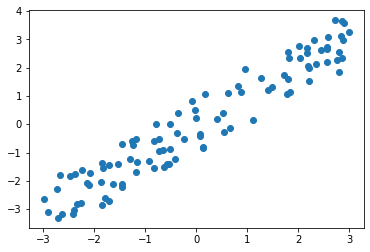

In [2]:
n = 100
x = np.sort(npr.rand(n)*6 - 3)
y = x + npr.rand(n)*2 - 1
plt.scatter(x, y)

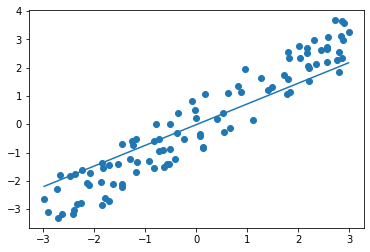

In [3]:
def get_prediction(x_pred, alpha=1.0):
    model = Lasso(alpha=alpha)
    model.fit(x.reshape(-1, 1), y)
    return model.predict(x_pred.reshape(-1, 1))
x_pred = np.linspace(x.min(), x.max())
y_pred = get_prediction(x_pred)
plt.scatter(x, y)
plt.plot(x_pred, y_pred)

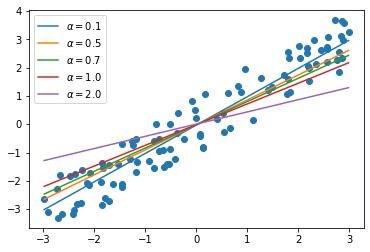

In [4]:
plt.scatter(x, y)
for alpha in [0.1, 0.5, 0.7, 1.0, 2.0]:  # np.logspace(-1, 1, 5):
    y_pred = get_prediction(x_pred, alpha)
    plt.plot(x_pred, y_pred, label=r"$\alpha={0:.1f}$".format(alpha))
plt.legend()

It would appear that $\alpha>-1$ does not always result in a null hypothesis.